In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os 

In [2]:
df = pd.read_csv("AMZN.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
1,2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2,2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
3,2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
4,2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400


In [3]:
af = pd.read_csv("AAPL.csv")
af.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,154.889999,158.850006,154.229996,157.919998,155.214005,37039700
1,2019-01-03,143.979996,145.720001,142.000000,142.190002,139.753540,91312200
2,2019-01-04,144.529999,148.550003,143.800003,148.259995,145.719513,58607100
3,2019-01-07,148.699997,148.830002,145.899994,147.929993,145.395203,54777800
4,2019-01-08,149.559998,151.820007,148.520004,150.750000,148.166870,41025300


In [4]:
ef = pd.read_csv("GOOG.csv")
ef.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
1,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
2,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
4,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [5]:
op=df.merge(ef,on='Date').merge(af,on='Date')
op_four = op[['Date', 'Close_x', 'Close_y', 'Close']]
cols = ['Date', 'Close_x', 'Close_y', 'Close']
op_list_four = op_four[cols]
output=op_list_four.rename(columns={'Close_x': 'AMZN', 'Close_y': 'GOOG','Close': 'AAPL'})
print(output)

           Date         AMZN         GOOG        AAPL
0    2019-01-02  1539.130005  1045.849976  157.919998
1    2019-01-03  1500.280029  1016.059998  142.190002
2    2019-01-04  1575.390015  1070.709961  148.259995
3    2019-01-07  1629.510010  1068.390015  147.929993
4    2019-01-08  1656.579956  1076.280029  150.750000
..          ...          ...          ...         ...
247  2019-12-24  1789.209961  1343.560059  284.269989
248  2019-12-26  1868.770020  1360.400024  289.910004
249  2019-12-27  1869.800049  1351.890015  289.799988
250  2019-12-30  1846.890015  1336.140015  291.519989
251  2019-12-31  1847.839966  1337.020020  293.649994

[252 rows x 4 columns]


In [6]:
print(output.mean(axis=0))
final= output.loc[:,"AMZN":"AAPL"].div(output.mean(axis=0), axis=1)
final['Date']= output['Date']
final=final.set_index('Date')
final

AMZN    1789.189206
GOOG    1188.393057
AAPL     208.255952
dtype: float64


,AMZN,GOOG,AAPL
Date,,,
2019-01-02,0.860239,0.880054,0.758298
2019-01-03,0.838525,0.854986,0.682766
2019-01-04,0.880505,0.900973,0.711912
2019-01-07,0.910753,0.899021,0.710328
2019-01-08,0.925883,0.905660,0.723869
...,...,...,...
2019-12-24,1.000012,1.130569,1.365003
2019-12-26,1.044479,1.144739,1.392085
2019-12-27,1.045054,1.137578,1.391557


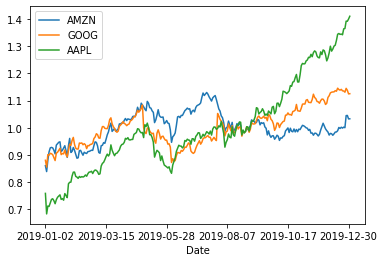

In [7]:
final.plot()